In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jane-street-market-prediction/example_sample_submission.csv
/kaggle/input/jane-street-market-prediction/features.csv
/kaggle/input/jane-street-market-prediction/example_test.csv
/kaggle/input/jane-street-market-prediction/train.csv
/kaggle/input/jane-street-market-prediction/janestreet/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/jane-street-market-prediction/janestreet/__init__.py


In [2]:
import datatable as dt

train_data_datatable = dt.fread('/kaggle/input/jane-street-market-prediction/train.csv')
train_data = train_data_datatable.to_pandas()

In [3]:
train_data

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390486,499,0.000000,0.000142,0.000142,0.005829,0.020342,0.015396,1,-1.649365,-1.169996,...,-1.896874,-1.260055,1.947725,-1.994399,-1.685163,-2.866165,-0.216130,-1.892048,0.901585,2390486
2390487,499,0.000000,0.000012,0.000012,-0.000935,-0.006326,-0.004718,1,2.432943,5.284504,...,-0.936553,1.064936,3.119762,-0.419796,-0.208975,-0.146749,0.730166,0.648452,2.068737,2390487
2390488,499,0.000000,0.000499,0.000499,0.007605,0.024907,0.016591,1,-0.622475,-0.963682,...,-2.956745,-0.640334,-2.279663,-0.950259,-4.388417,-1.669922,-3.288939,-1.336142,-2.814239,2390488
2390489,499,0.283405,-0.000156,-0.000156,-0.001375,-0.003702,-0.002004,-1,-1.463757,-1.107228,...,-2.035894,-1.780962,0.881246,-2.202140,-1.912601,-3.341684,-0.571188,-2.185795,0.627452,2390489


In [4]:
features = [c for c in train_data.columns if 'feature' in c]

## resp

- long tail, between -0.549 and 0.448
- similar to Cauchy distribution

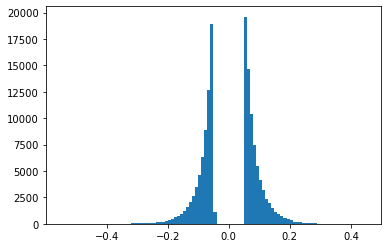

In [11]:
import matplotlib.pyplot as plt

plt.hist(train_data[train_data['resp'].abs()>0.05].resp, bins=100)
plt.show()

In [19]:
train_data['resp0'] = train_data.apply(lambda x: min(max(x['resp'],-0.05),0.05),axis=1)

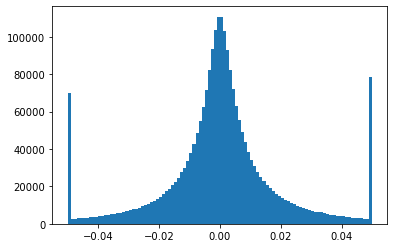

In [25]:
plt.hist(train_data[train_data['resp0'].abs()<1].resp0, bins=100)
plt.show()

## weight
- long tail, max: 167.29
- 17% of zero weight

In [ ]:
# preprocess the features
f_mean = train_data[features].mean()
train_data = train_data.loc[train_data.weight > 0].reset_index(drop = True)

train_data[features] = train_data[features].fillna(f_mean)
train_data['action'] = (train_data['resp'] > 0).astype('int')
train_data['profit'] = train_data['resp']*train_data['weight']

In [ ]:
train_data['profit'].describe()

In [ ]:
import matplotlib.pyplot as plt

plt.hist(train_data[train_data['profit'].abs()<0.5].profit, bins=100)
plt.show()

In [ ]:
plt.plot(train_data['profit'].cumsum())
plt.plot(train_data['resp'].cumsum())
plt.show()

In [ ]:
sort = train_data[['resp','weight','profit']].copy()
sort = sort.sort_values(by='profit').reset_index(drop=True)
plt.plot(sort['profit'].cumsum())
plt.show()

In [ ]:
sort

In [ ]:
tmp = sort.sort_values(by='resp').reset_index(drop=True)
plt.plot(tmp['resp'].cumsum())
plt.show()

## PCA

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(train_data[features])

import matplotlib.pyplot as plt
plt.figure()
plt.plot(pca.explained_variance_, 'k', linewidth=2)
plt.xlabel('n_components', fontsize=16)
plt.ylabel('explained_variance_', fontsize=16)
plt.show()

In [ ]:
plt.figure()
plt.plot(pca.explained_variance_ratio_, 'b', linewidth=2)
plt.plot(pca.explained_variance_ratio_.cumsum(), 'orange', linewidth=2)
plt.xlabel('n_components', fontsize=16)
plt.ylabel('explained_variance_', fontsize=16)
plt.show()

In [ ]:
pca2 = decomposition.PCA(n_components=20)
pca2.fit(train_data[features])
plt.figure()
plt.plot(pca2.explained_variance_ratio_, 'b', linewidth=2)
plt.plot(pca2.explained_variance_ratio_.cumsum(), 'orange', linewidth=2)
plt.xlabel('n_components', fontsize=16)
plt.ylabel('explained_variance_', fontsize=16)
plt.show()

#reduced_x=pca.fit_transform(x) #对样本进行降维

In [ ]:
reduced_x=pca2.fit_transform(train_data[features]) #对样本进行降维

In [ ]:
train_re = pd.DataFrame(reduced_x)
train_re['action'] = train_data['action']
train_re['resp'] = train_data['resp']
train_re['weight'] = train_data['weight']
train_re['profit'] = train_data['profit']
train_re

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(121)
plt.ylim(-200,200)
plt.scatter(train_re[train_re['action']>0][0], train_re[train_re['action']>0][1],
            s=1,c='b',linewidths=0)
plt.subplot(122)
plt.ylim(-200,200)
plt.scatter(train_re[train_re['action']==0][0], train_re[train_re['action']==0][1],
            s=1,c='b',linewidths=0)
    
plt.show()

## features & action

In [ ]:
plt.figure(figsize=(20,15))
for i,c in enumerate(features[:25]):
    plt.subplot(5,5,1+i)
    plt.scatter(train_data[train_data['action']>0][c], train_data[train_data['action']>0].resp,
                s=1,c='b',linewidths=0)
    plt.scatter(train_data[train_data['action']==0][c], train_data[train_data['action']==0].resp,
                s=1,c='orange',linewidths=0) 
    plt.xlabel('%s'%c)
    
plt.show()

In [ ]:
plt.figure(figsize=(20,15))
for i,c in enumerate(features[25:50]):
    plt.subplot(5,5,1+i)
    plt.scatter(train_data[train_data['action']>0][c], train_data[train_data['action']>0].resp,
                s=1,c='b',linewidths=0)
    plt.scatter(train_data[train_data['action']==0][c], train_data[train_data['action']==0].resp,
                s=1,c='orange',linewidths=0) 
    plt.xlabel('%s'%c)
    
plt.show()

## LDA

#### 1.sklearn

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(train_data[features],train_data['action'])
train_lda = lda.transform(train_data[features])


In [ ]:
train_lda  = pd.DataFrame(train_lda)
train_lda ['action'] = train_data['action']
train_re['resp'] = train_data['resp']
train_re['weight'] = train_data['weight']
train_re['profit'] = train_data['profit']
train_re

#### 2.code

In [ ]:
def lda_new(data, target, n_dim):
    '''
    :param data: (n_samples, n_features)
    :param target: data class
    :param n_dim: target dimension
    :return: (n_samples, n_dims)
    '''

    clusters = np.unique(target)

    if n_dim > len(clusters)-1:
        print("K is too much")
        print("please input again")
        exit(0)

    #within_class scatter matrix
    Sw = np.zeros((data.shape[1],data.shape[1]))
    for i in clusters:
        datai = data[target == i]
        datai = datai-datai.mean(0)
        Swi = np.mat(datai).T*np.mat(datai)
        Sw += Swi

    #between_class scatter matrix
    SB = np.zeros((data.shape[1],data.shape[1]))
    u = data.mean(0)  #所有样本的平均值
    for i in clusters:
        Ni = data[target == i].shape[0]
        ui = data[target == i].mean(0)  #某个类别的平均值
        SBi = Ni*np.mat(ui - u).T*np.mat(ui - u)
        SB += SBi
    S = np.linalg.inv(Sw)*SB
    eigVals,eigVects = np.linalg.eig(S)  #求特征值，特征向量
    eigValInd = np.argsort(eigVals)
    eigValInd = eigValInd[:(-n_dim-1):-1]
    w = eigVects[:,eigValInd]
    data_ndim = np.dot(data, w)

    return data_ndim



In [ ]:
train_lda = lda_new(train_data[features],train_data['action'],1)

In [ ]:
train_lda  = pd.DataFrame(train_lda)
train_lda['action'] = train_data['action']
train_lda['resp'] = train_data['resp']
train_lda['weight'] = train_data['weight']
train_lda['profit'] = train_data['profit']
train_lda

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(train_lda[train_lda['action']>0][0], train_lda[train_lda['action']>0]['resp'],
            s=1,c='b',linewidths=0)
plt.scatter(train_lda[train_lda['action']==0][0], train_lda[train_lda['action']==0]['resp'],
            s=1,c='r',linewidths=0)
    
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.subplot(211)
plt.xlim(-2,2)
plt.hist(train_lda[train_lda['action']>0][0],bins=500,facecolor='b')

plt.subplot(212)
plt.xlim(-2,2)
plt.hist(train_lda[train_lda['action']==0][0],bins=500,facecolor='orange')
    
plt.show()